In [137]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import random
import numpy as np
import math
import copy
%matplotlib inline

In [119]:
class Kmean:
    def __init__(self,data,init='rand',C=3,verb=1):
        self.data=data
        self.verb=verb
        self.init=init
        self.C=C
        self.data['y']=-1
        self.colors=['r','g','b','cyan','magenta','purple','k']
        if self.C>len(self.colors):
            self.colors=self.colors*int(np.ceil(self.C/len(self.colors)))
        self.Cov=np.cov(list(self.data.values()))
        if self.init=='rand':
            self.Random()
            self.mean()
        elif self.init=='forgy':
            self.Forgy()
        elif self.init=='K++':
            self.Kpp()
        else:
            print('Initialization type not recognized defaulting to random')
            self.init='rand'
            self.Random()
            self.mean()
        self.cluster()
    def Random(self):
            self.mu=[[-1,-1]]*self.C
            y=np.random.randint(0,self.C,len(self.data['y']))
            test=1
            for i in range(self.C):
                test*=len(np.where(y==i)[0])
            if test==0:
                while test==0:
                    y=np.random.randint(0,self.C,len(self.data['y']))
                    test=1
                    for i in range(self.C):
                        test*=len(np.where(y==i)[0])
            self.data['y']=y
    def Forgy(self):
        self.mu=[]
        sample=[]
        while len(np.unique(sample))!=self.C:
            sample=np.random.randint(0,len(self.data),self.C)
        for a in sample:
            muk=list(self.data['col1','col2'][a].values())
            self.mu.append(muk)       
    def Kpp(self):
        self.mu=[]
        self.mu.append(self.data['col1','col2'][np.random.randint(0,len(self.data))])
        while len(self.mu)!=self.C:
            prob=np.zeros(len(self.data))
            for i in range(len(self.data)):
                t=[0]*len(self.mu)
                for k in range(len(self.mu)):
                    t[k]=self.Dist2(self.data['col1','col2'][i],self.mu[k])**2
                prob[i]=min(t)
            prob/=sum(prob)
            s=np.random.choice(np.arange(0,len(prob),1),p=prob)
            self.mu.append(self.data['col1','col2'][s])
    def Dist2(self,x,y):
        d=0
        if len(x)==len(y):
            for z in range(len(y)):
                d+=(x[z]-y[z])**2
        return d
    def cluster(self):
        for i in range(len(self.data)):
            t=[0]*self.C
            for k in range(self.C):
                t[k]=self.Dist2(self.data['col1','col2'][i],self.mu[k])
            self.data[i]['y']=np.argmin(t)
    def mean(self):
        for c in range(self.C):
            z=np.where(self.data['y']==c)
            muk=[np.mean(self.data[z]['col1']),np.mean(self.data[z]['col2'])]
            self.mu[c]=muk
    def Loss(self,norm=False):
        E=0
        for c in range(self.C):
            z=np.where(self.data['y']==c)
            for i in z[0]:
                E+=self.Dist2(self.data['col1','col2'][i],self.mu[c])
        if norm:
            return E/np.trace(self.Cov)
        else:
            return(E)
    def plot(self):
        for i in range(len(self.data)):
            plt.scatter(self.data[i]['col1'],self.data[i]['col2'],color=self.colors[self.data[i]['y']])
        for c in range(self.C):
            plt.scatter(self.mu[c][0],self.mu[c][1],marker='*',color=self.colors[c],edgecolors='y')
        plt.show()
    def Sillouette(self,i):
        z=np.where(self.data['y']==self.data['y'][i])
        a=0
        b=0
        for j in range(len(self.data)):
            if j in z[0]:
                a+=np.sqrt(self.Dist2(self.data[i]['col1','col2'],self.data[j]['col1','col2']))
            else:
                b+=np.sqrt(self.Dist2(self.data[i]['col1','col2'],self.data[j]['col1','col2']))
        a/=(len(z[0]-1))
        b/=(len(self.data)-len(z[0]))
        if a==b:
            return 0
        elif a>b:
            return (b/a)-1
        else:
            return 1-(a/b)
    def AverageSillouette(self):
        AS=0
        for i in range(len(self.data)):
            AS+=self.Sillouette(i)
        return AS/len(self.data)
    def run(self,itt=100):
        for i in range(itt):
            if self.verb>1:
                print('Itteration',i+1,'Log10(Loss): ',np.log10(self.Loss(norm=True)))
            self.oldmu = copy.deepcopy(self.mu)
            self.mean()
            self.cluster()
            #self.plot()
            if np.array_equal(self.oldmu,self.mu):
                if self.verb>0:
                    print('Convergence Reached',i,' Itterations \nLoss:',self.Loss(norm=True))
                break
            if i ==itt-1:
                print('Max Itteration Reached')

In [115]:
three=ascii.read('three.csv')

Itteration 1 Log10(Loss):  0.6979627476214056
Itteration 2 Log10(Loss):  0.2781057511150551
Convergence Reached 1  Itterations 
Loss: 1.8971678271229184


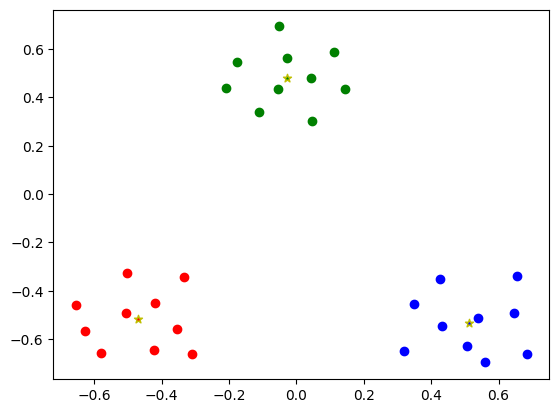

In [116]:
K=Kmean(three,init='K++',C=3,verb=2)
K.run()
#print('Average Sillouette',K.AverageSillouette())
K.plot()

In [126]:
Sillouttes=[0]

### C=1

In [127]:
Lossesi=[]
Sillouettesi=[]
for i in range(10):
    print('Itteration',i+1)
    K=Kmean(three,init='K++',C=1)
    K.run()
    Lossesi.append(np.log10(K.Loss(norm=True)))
    Sillouettesi.append(K.AverageSillouette())
Sillouttes.append(Sillouettesi[np.argmin(Lossesi)])

Itteration 1
Convergence Reached 1  Itterations 
Loss: 29.00000000000001


ZeroDivisionError: division by zero

### C=2

In [128]:
Lossesi=[]
Sillouettesi=[]
for i in range(10):
    print('Itteration',i+1)
    K=Kmean(three,init='K++',C=2)
    K.run()
    Lossesi.append(np.log10(K.Loss(norm=True)))
    Sillouettesi.append(K.AverageSillouette())
Sillouttes.append(Sillouettesi[np.argmin(Lossesi)])

Itteration 1
Convergence Reached 1  Itterations 
Loss: 13.176772253910027
Itteration 2
Convergence Reached 1  Itterations 
Loss: 13.176772253910027
Itteration 3
Convergence Reached 1  Itterations 
Loss: 13.176772253910027
Itteration 4
Convergence Reached 3  Itterations 
Loss: 17.348070754696046
Itteration 5
Convergence Reached 1  Itterations 
Loss: 15.820908732078308
Itteration 6
Convergence Reached 3  Itterations 
Loss: 17.348070754696046
Itteration 7
Convergence Reached 3  Itterations 
Loss: 15.820908732078308
Itteration 8
Convergence Reached 2  Itterations 
Loss: 13.176772253910027
Itteration 9
Convergence Reached 1  Itterations 
Loss: 15.820908732078308
Itteration 10
Convergence Reached 2  Itterations 
Loss: 13.176772253910027


### C=3


In [129]:
Lossesi=[]
Sillouettesi=[]
for i in range(10):
    print('Itteration',i+1)
    K=Kmean(three,init='K++',C=3)
    K.run()
    Lossesi.append(np.log10(K.Loss(norm=True)))
    Sillouettesi.append(K.AverageSillouette())
Sillouttes.append(Sillouettesi[np.argmin(Lossesi)])

Itteration 1
Convergence Reached 1  Itterations 
Loss: 1.8971678271229189
Itteration 2
Convergence Reached 1  Itterations 
Loss: 1.8971678271229184
Itteration 3
Convergence Reached 1  Itterations 
Loss: 1.8971678271229186
Itteration 4
Convergence Reached 1  Itterations 
Loss: 1.8971678271229189
Itteration 5
Convergence Reached 1  Itterations 
Loss: 1.8971678271229184
Itteration 6
Convergence Reached 1  Itterations 
Loss: 1.8971678271229184
Itteration 7
Convergence Reached 1  Itterations 
Loss: 1.8971678271229184
Itteration 8
Convergence Reached 1  Itterations 
Loss: 1.8971678271229184
Itteration 9
Convergence Reached 1  Itterations 
Loss: 1.8971678271229184
Itteration 10
Convergence Reached 1  Itterations 
Loss: 1.8971678271229189


### C=4

In [130]:
Lossesi=[]
Sillouettesi=[]
for i in range(10):
    print('Itteration',i+1)
    K=Kmean(three,init='K++',C=4)
    K.run()
    Lossesi.append(np.log10(K.Loss(norm=True)))
    Sillouettesi.append(K.AverageSillouette())
Sillouttes.append(Sillouettesi[np.argmin(Lossesi)])

Itteration 1
Convergence Reached 1  Itterations 
Loss: 1.6519874271437902
Itteration 2
Convergence Reached 1  Itterations 
Loss: 1.665141131207732
Itteration 3
Convergence Reached 1  Itterations 
Loss: 1.6650743058602084
Itteration 4
Convergence Reached 1  Itterations 
Loss: 1.665141131207732
Itteration 5
Convergence Reached 1  Itterations 
Loss: 1.643116612271754
Itteration 6
Convergence Reached 1  Itterations 
Loss: 1.6653805424045627
Itteration 7
Convergence Reached 1  Itterations 
Loss: 1.6899280737817342
Itteration 8
Convergence Reached 1  Itterations 
Loss: 1.6899280737817344
Itteration 9
Convergence Reached 1  Itterations 
Loss: 1.678495489100336
Itteration 10
Convergence Reached 1  Itterations 
Loss: 1.6653805424045627


### C=5

In [131]:
Lossesi=[]
Sillouettesi=[]
for i in range(10):
    print('Itteration',i+1)
    K=Kmean(three,init='K++',C=5)
    K.run()
    Lossesi.append(np.log10(K.Loss(norm=True)))
    Sillouettesi.append(K.AverageSillouette())
Sillouttes.append(Sillouettesi[np.argmin(Lossesi)])

Itteration 1
Convergence Reached 3  Itterations 
Loss: 1.4506473941663482
Itteration 2
Convergence Reached 2  Itterations 
Loss: 1.4365233502769164
Itteration 3
Convergence Reached 3  Itterations 
Loss: 1.4333538464893758
Itteration 4
Convergence Reached 1  Itterations 
Loss: 1.3619530905379296
Itteration 5
Convergence Reached 1  Itterations 
Loss: 1.4117991939726484
Itteration 6
Convergence Reached 2  Itterations 
Loss: 1.396654957926222
Itteration 7
Convergence Reached 2  Itterations 
Loss: 1.3966549579262222
Itteration 8
Convergence Reached 1  Itterations 
Loss: 1.433047609945022
Itteration 9
Convergence Reached 2  Itterations 
Loss: 1.4475356319681674
Itteration 10
Convergence Reached 3  Itterations 
Loss: 1.366817345808167


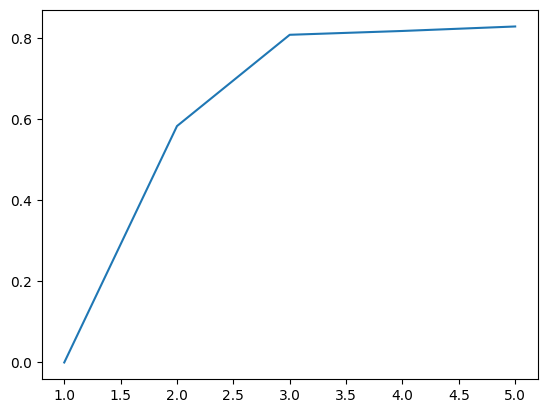

In [132]:
plt.plot([1,2,3,4,5],Sillouttes)

In [133]:
atoll=ascii.read('atoll.csv')

Itteration 1
Convergence Reached 5  Itterations 
Loss: 37.94679856761696


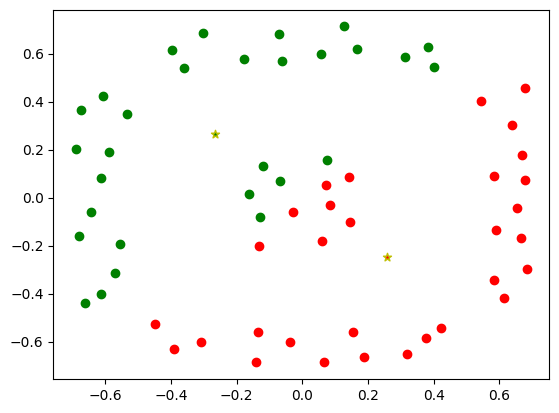

Itteration 2
Convergence Reached 1  Itterations 
Loss: 37.66604922538409


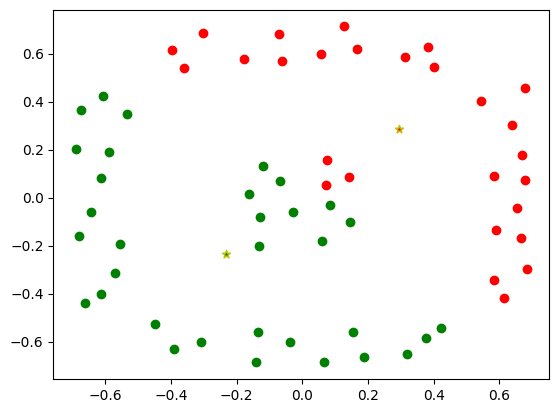

Itteration 3
Convergence Reached 2  Itterations 
Loss: 37.927287190454855


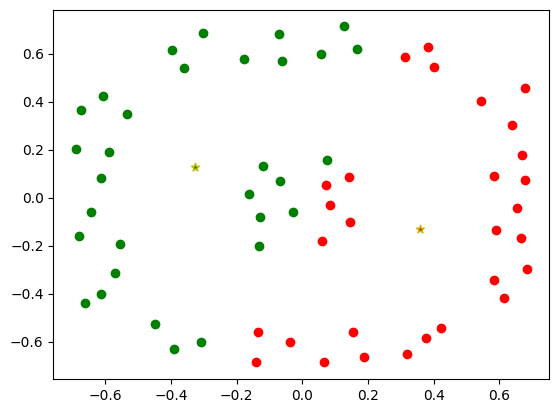

Itteration 4
Convergence Reached 1  Itterations 
Loss: 38.09512994823432


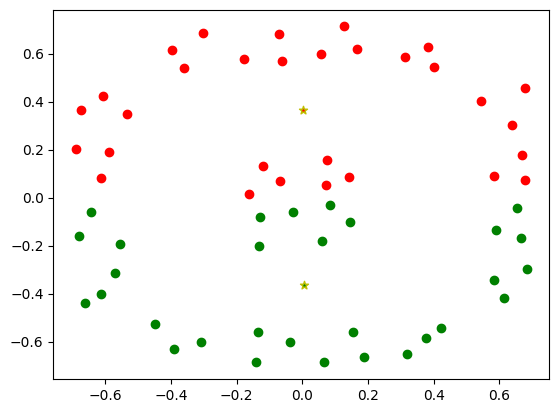

Itteration 5
Convergence Reached 6  Itterations 
Loss: 38.583679442822415


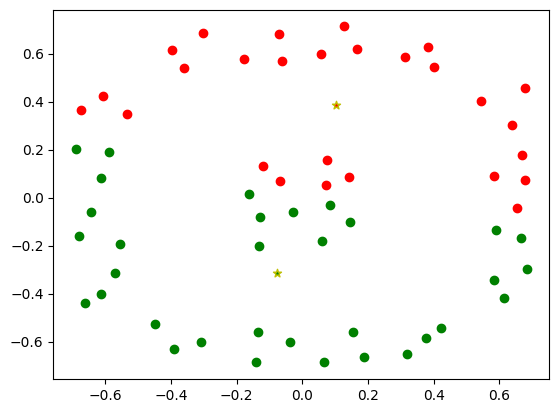

Itteration 6
Convergence Reached 1  Itterations 
Loss: 38.09512994823432


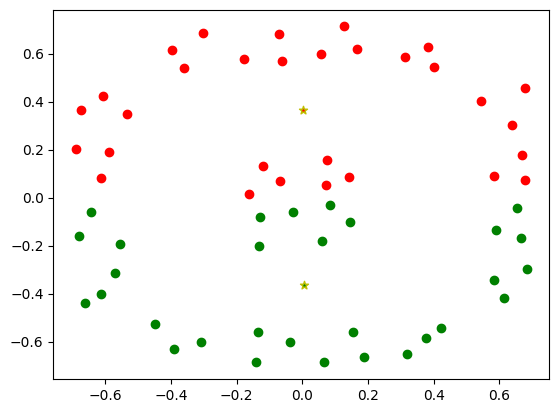

Itteration 7
Convergence Reached 2  Itterations 
Loss: 38.441577600881295


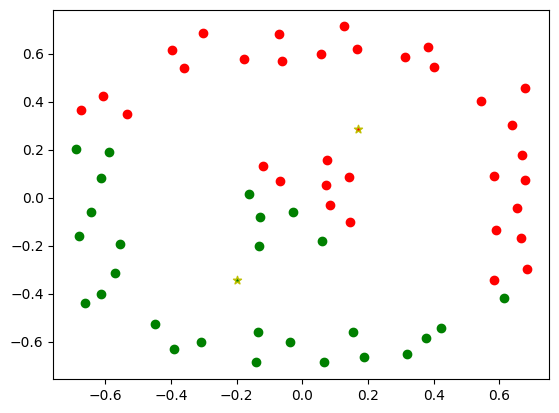

Itteration 8
Convergence Reached 2  Itterations 
Loss: 37.94679856761696


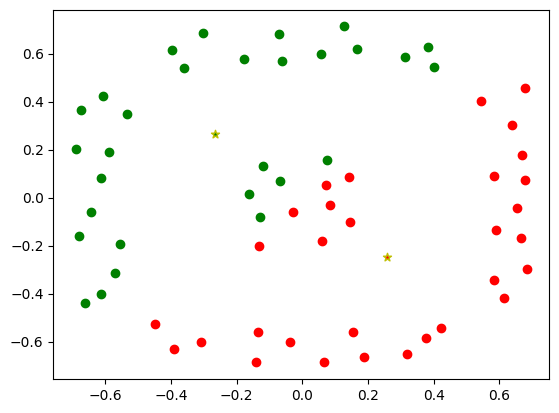

Itteration 9
Convergence Reached 7  Itterations 
Loss: 38.09512994823432


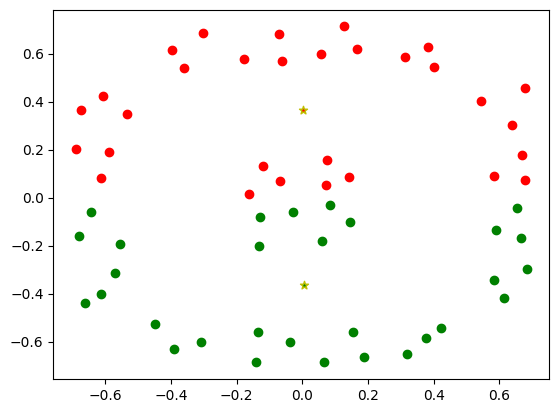

Itteration 10
Convergence Reached 1  Itterations 
Loss: 38.22230948482406


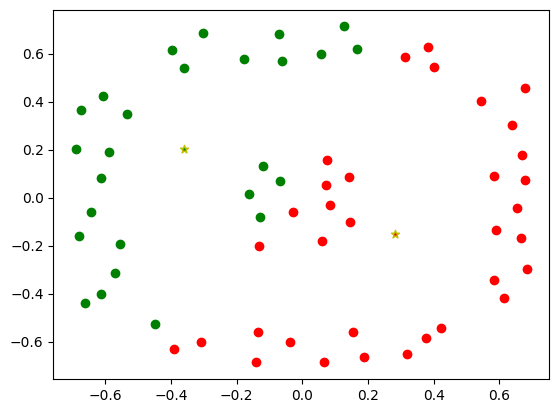

In [139]:
for i in range(10):
    print('Itteration',i+1)
    K2=Kmean(atoll,init='K++',C=2,verb=1)
    K2.run()
    K2.plot()

Itteration 1
Convergence Reached 4  Itterations 
Loss: 13.317742026909619


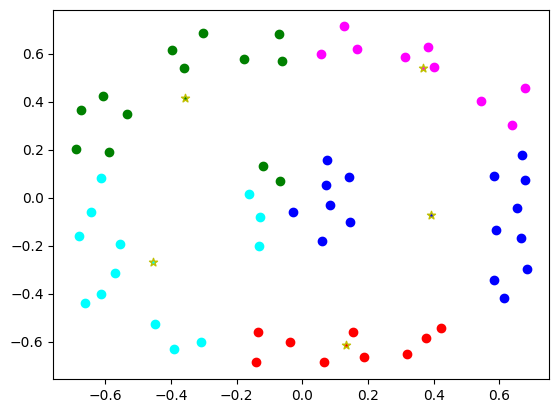

Itteration 2
Convergence Reached 3  Itterations 
Loss: 11.064761138821574


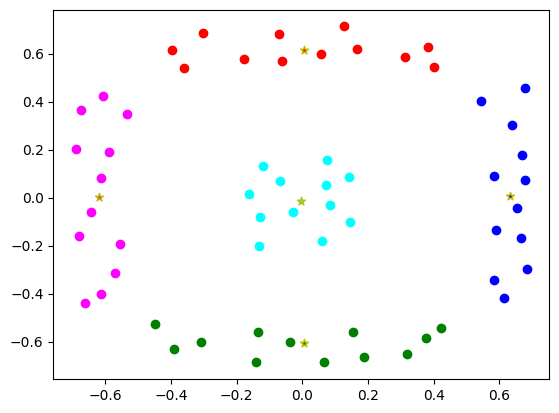

Itteration 3
Convergence Reached 4  Itterations 
Loss: 13.217382138123764


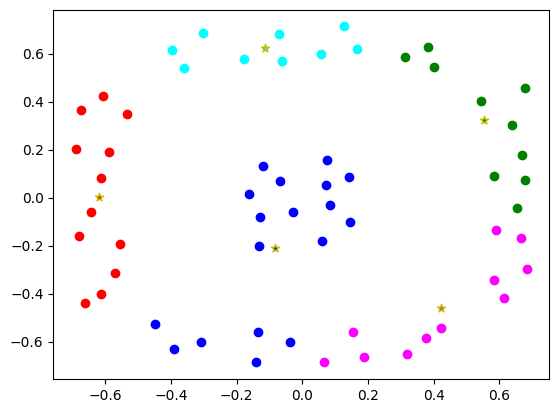

Itteration 4
Convergence Reached 3  Itterations 
Loss: 13.656055099033305


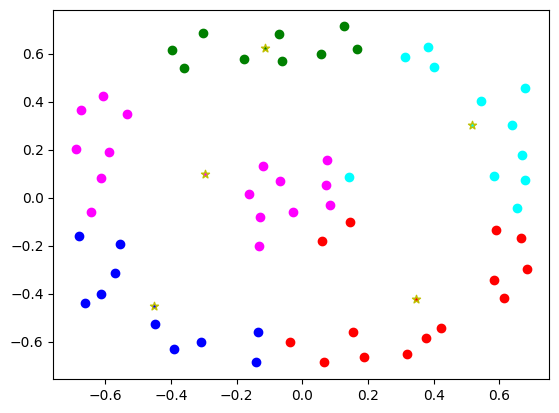

Itteration 5
Convergence Reached 2  Itterations 
Loss: 13.371068360265925


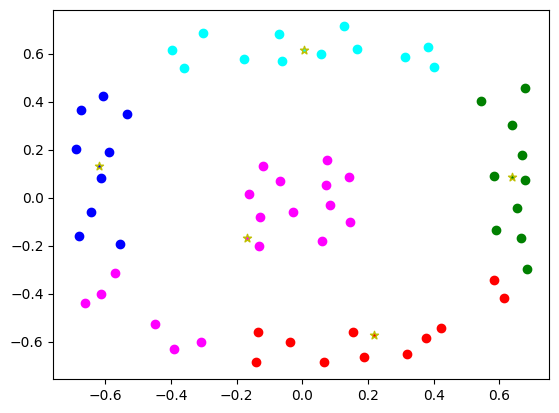

Itteration 6
Convergence Reached 2  Itterations 
Loss: 14.1436416431664


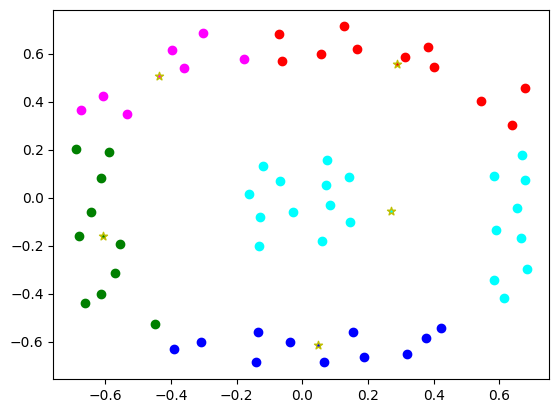

Itteration 7
Convergence Reached 3  Itterations 
Loss: 12.944252592177746


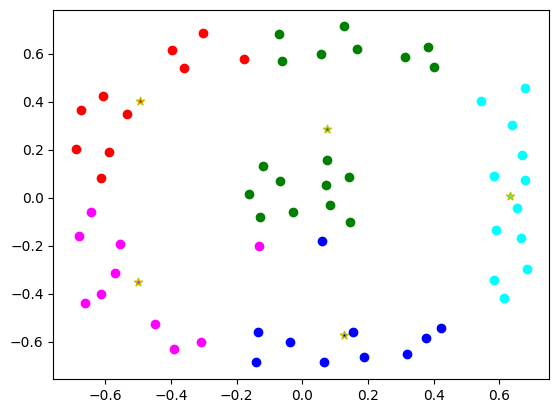

Itteration 8
Convergence Reached 3  Itterations 
Loss: 11.967651220713647


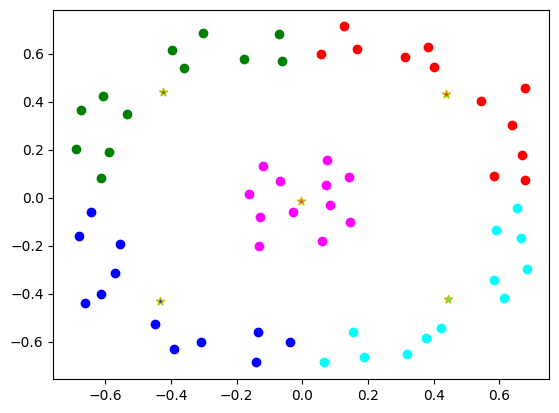

Itteration 9
Convergence Reached 4  Itterations 
Loss: 12.10667527515903


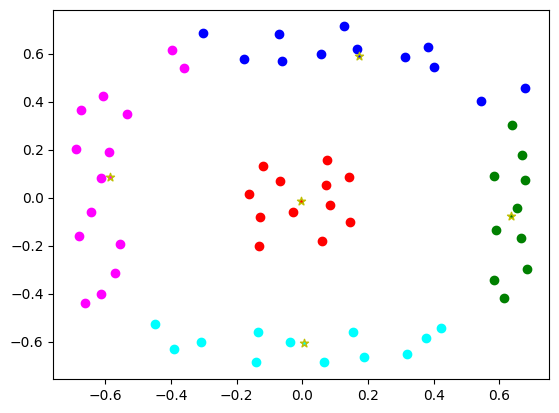

Itteration 10
Convergence Reached 3  Itterations 
Loss: 13.755641953040184


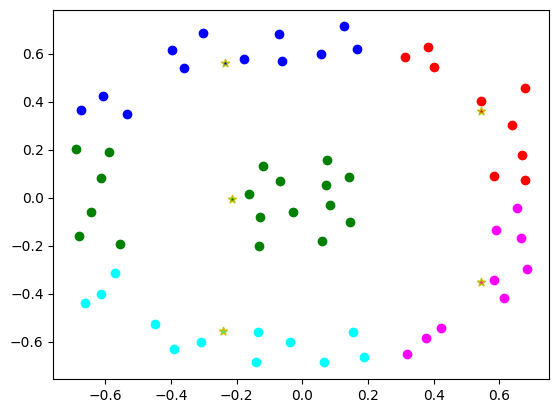

In [140]:
for i in range(10):
    print('Itteration',i+1)
    K2=Kmean(atoll,init='K++',C=5,verb=1)
    K2.run()
    K2.plot()